# Problem 1: Linear Regression


## You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:

* Variable Name	: Description
* Carat	-- Carat weight of the cubic zirconia.
* Cut	-- Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
* Color 	-- Colour of the cubic zirconia.With D being the best and J the worst.
* Clarity	-- cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* Depth	-- The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
* Table	-- The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
* Price	-- the Price of the cubic zirconia.
* X	-- Length of the cubic zirconia in mm.
* Y	-- Width of the cubic zirconia in mm.
* Z	-- Height of the cubic zirconia in mm.

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

### Importing the necessary libraries for the model building.
### Reading the head and tail of the dataset to get an overview of our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("cubic_zirconia.csv")

### HEAD OF THE DATA

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### TAIL OF THE DATA

In [4]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


### Checking the Shape of the Dataset

In [5]:
print("The total number of rows present in the dataset above is :  ",df.shape[0])
print("The total number of columns/variables present in the dataset above is :  ",df.shape[1])

The total number of rows present in the dataset above is :   26967
The total number of columns/variables present in the dataset above is :   11


### Checking the info of the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

### We have float, int and object data types in the data.
### It can also be observed that there are some null values present in "depth". 


### Data Description

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


* We have both categorical and continuous data,
* For categorical data we have cut, colour and clarity
* For continuous data we have carat, depth, table, x. y, z and price
* Price will be target variable.

### Checking for Duplicates and removing the Unnamed: 0 column

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [10]:
df=df.drop("Unnamed: 0",axis=1)

###  Checking for unique values of the categorical variables

In [11]:
for column in df.columns:
    if( df[column].dtype == "object"):
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




### Checking for unique values of the numerical variables

In [12]:
df[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()


carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

## Performing Exploratory Data Analysis
### Univariate/Bivariate Analysis

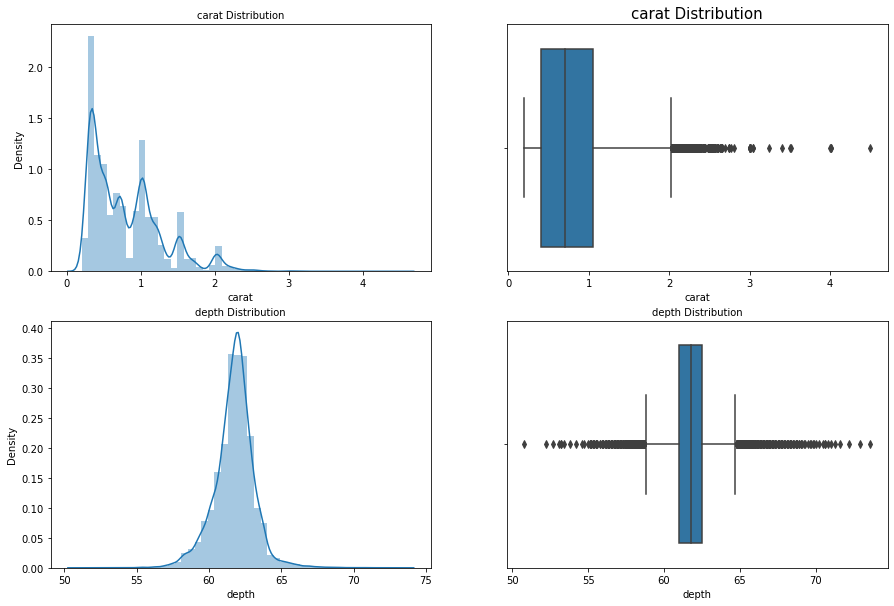

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(df['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10);





* <h3>The distribution of data in "carat" seems to positively skewed, as there are multiple peaks points in the distribution there could multimode and the box plot of carat seems to have large number of outliers. In the range of 0 to 1 where majority of data lies.

* <h4>The distribution of "depth" seems to be normal distribution. The depth ranges from 55 to 65. The box plot of the depth distribution holds many outliers.

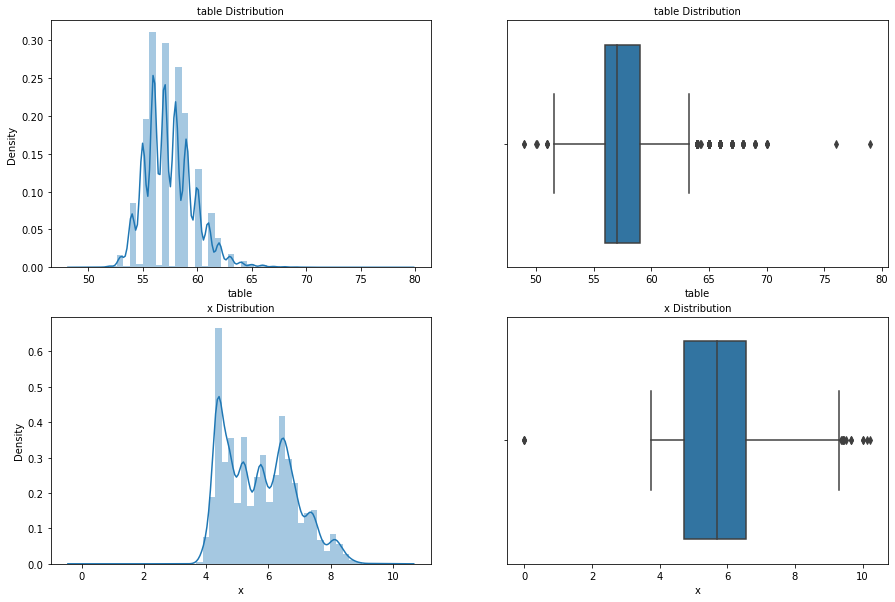

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(df['table'] , ax=axes[0][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(df['table'] , orient = "v" , ax=axes[0][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(df['x'] , ax=axes[1][0])
a.set_title("x Distribution",fontsize=10);

a = sns.boxplot(df['x'] , orient = "v" , ax=axes[1][1])
a.set_title("x Distribution",fontsize=10);


* <h3>The distribution of table also seems to be positively skewed. The box plot of table has outliers. The data distributon for  maximum distribution lies between 55 to 65.
* <h4>The distribution of x (Length of the cubic zirconia in mm.) is positively skewed. The box plot of the data consists of many outliers and the distribution rages from 4 to 8

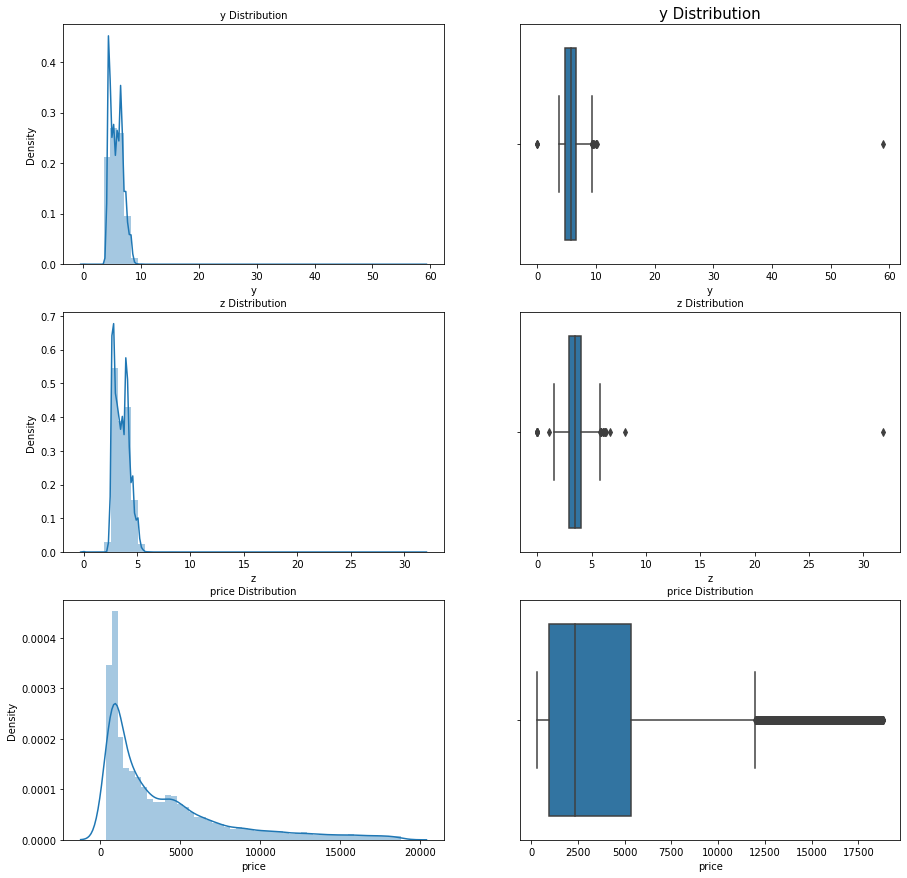

In [15]:

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)

a = sns.distplot(df['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(df['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(df['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(df['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(df['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=10);

* <h3>The distribution of "Y" (Width of the cubic zirconia in mm.) is positively skewed The box plot also consists of outliers The distribution too much positively skewed. The skewness may be due to the diamonds are always made in specific shape. There might not be too much sizes in the market.
    
* <h4>The distribution of "z" (Height of the cubic zirconia in mm.) is positively skewed The box plot also consists of outliers The distribution too much positively skewed. The skewness may be due to the diamonds are always made in specific shape. There might not be too much sizes in the market.
    
* <h5>The distribution of "price" seems to be positively skewed.
The price boxplot has outliers in the data.
The price distribution ranges from Rs 100 to 8000.

## Price-Histogram

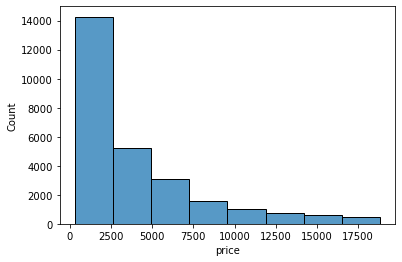

In [16]:
sns.histplot(df.price, bins = 8)

plt.show()

### Observing the Skewness Present in the variables

In [17]:
df.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

###  Categorical Variables
### CUT
#### Quality is increasing order Fair, Good, Very Good, Premium, Ideal.



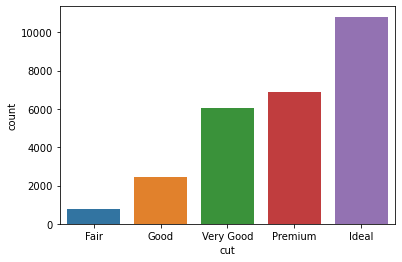

In [18]:
sns.countplot(df['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

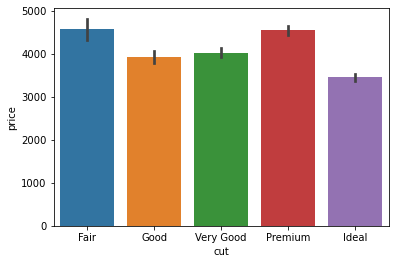

In [19]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

### The most preferred cut seems to be ideal cut for diamonds.The reason for the most preferred cut ideal is because those diamonds are priced lower than other cuts.

## COLOR
### D being the best and J the worst.

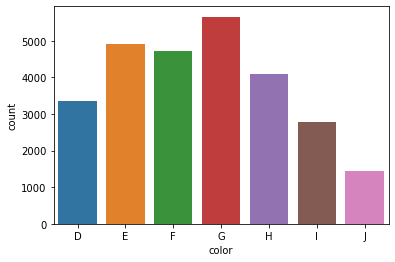

In [20]:
sns.countplot(df['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J']);

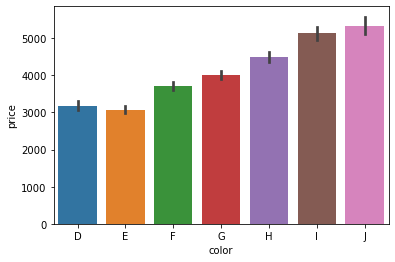

In [21]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] );

### We have 7 colours in the data, The G seems to be the preferred colour,We see the G is priced in the middle of the seven colours, whereas J being the worst colour price seems too high.

## CLARITY: 
### Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

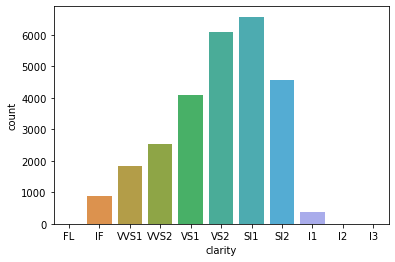

In [22]:
sns.countplot(df['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']);

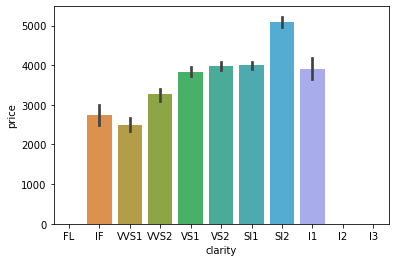

In [23]:
sns.barplot(data = df, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']);

### The clarity VS2 seems to be preferred by people
### The data has No FL diamonds, from this we can clearly understand the flawless diamonds are not bringing any profits to the store.

### More relationship between categorical variables
### Cut and Color

In [24]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


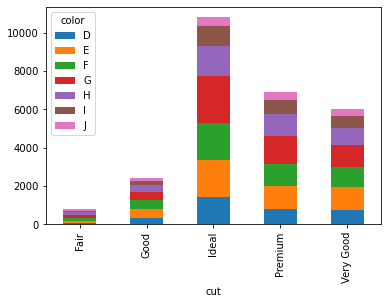

In [25]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True);

### Cut and Clarity

In [26]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


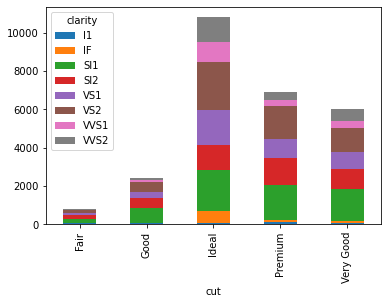

In [27]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True);

## Correlation

### Carat v/s Price

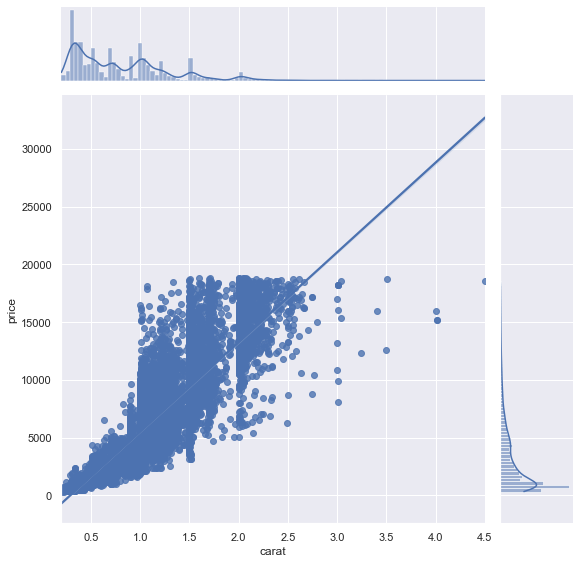

In [28]:

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('carat', 'price', data = df, kind='reg', height=8)
plt.show();

### Depth v/s Price

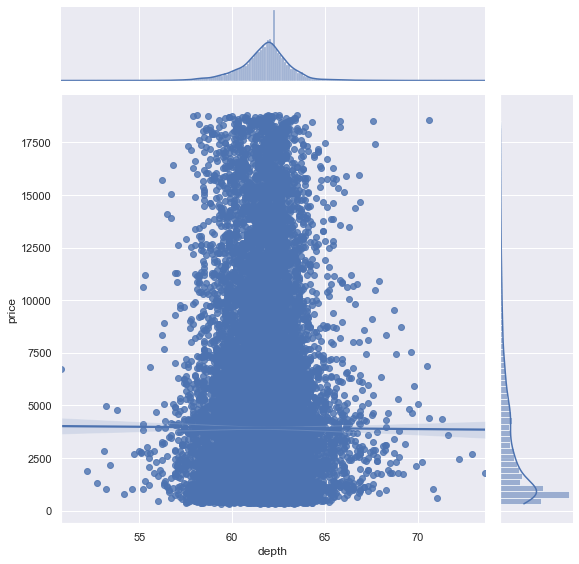

In [29]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('depth', 'price', data = df, kind='reg', height=8)
plt.show()

### X v/s Price

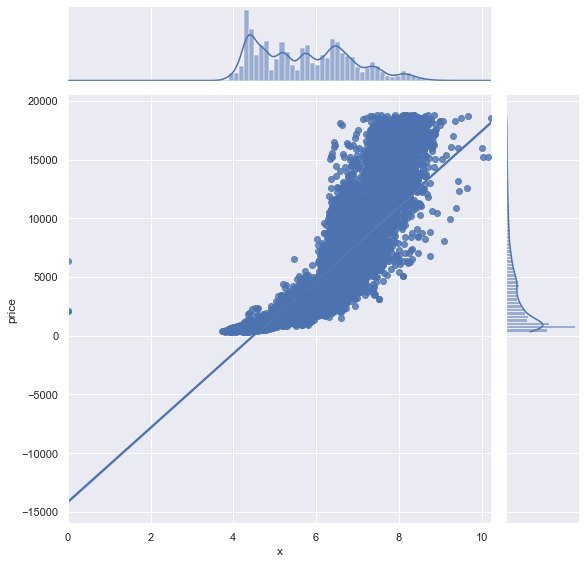

In [30]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('x', 'price', data = df, kind='reg', height=8)
plt.show()

### Y v/s Price

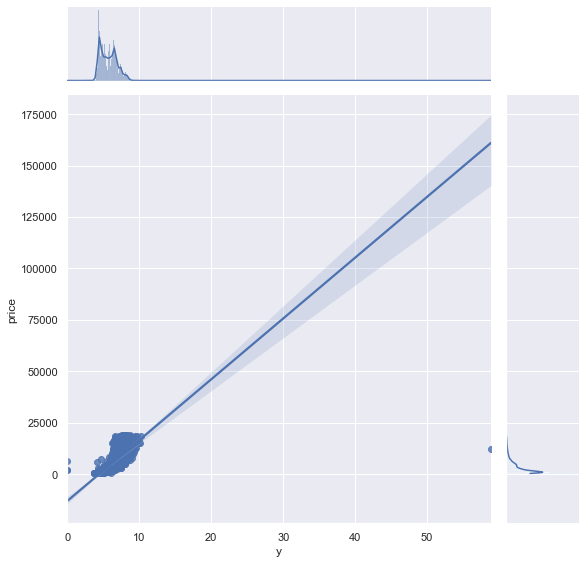

In [31]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('y', 'price', data = df, kind='reg', height=8)
plt.show()

### Z v/s Price

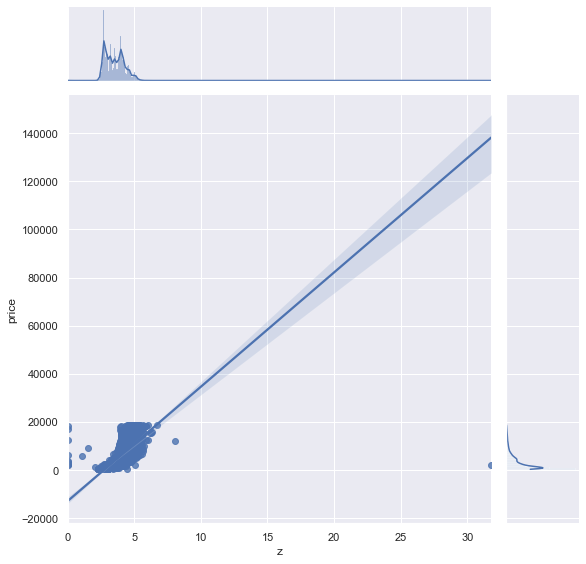

In [32]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('z', 'price', data = df, kind='reg', height=8)
plt.show()

## Bivariate Analysis

### Pairplot

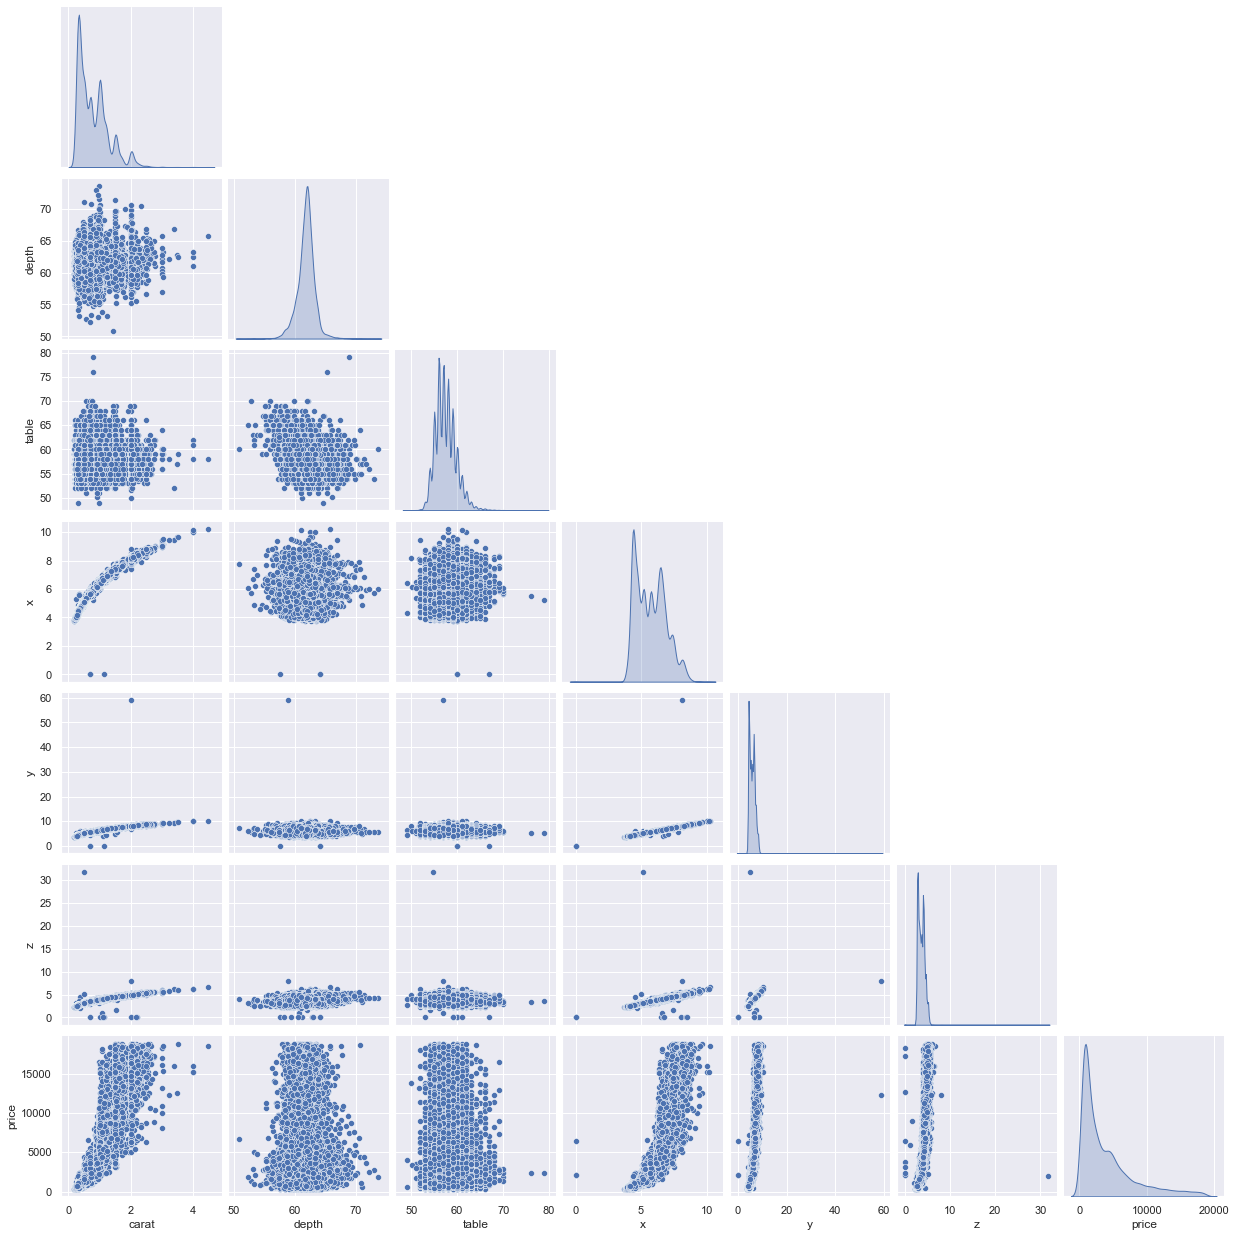

In [33]:
sns.pairplot(df, diag_kind='kde', corner=True)  
plt.show()

### Correlation Matrix

In [34]:
corr = df.corr(method='pearson')

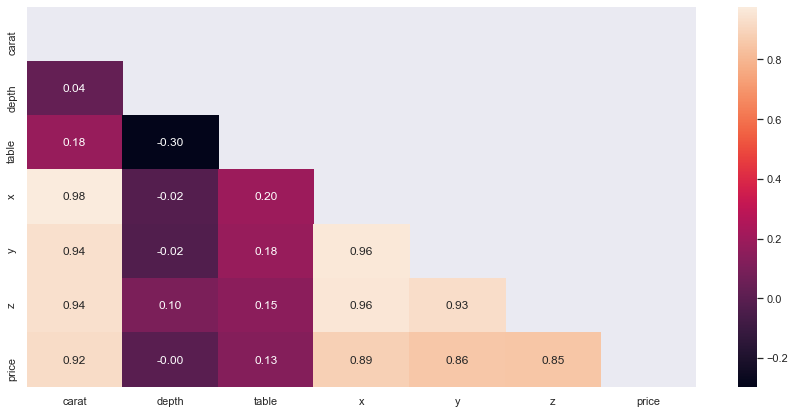

In [35]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

### This matrix clearly shows the presence of multi collinearity in the dataset where lighter colors depict a high correlation and darker colors as the weakest correlation.
### Here carat has very high correlation to x,y,z, and price.

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [36]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Checking if there is value that is “0”

In [37]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


*  Yes we have Null values in depth, since depth being continuous variable mean or median imputation can be done.
*  The percentage of Null values is less than 5%, we can also drop these if we want.
*  After median imputation, we don’t have any null values in the dataset.


*  We have certain rows having values zero, the x, y, z are the dimensions of a diamond so this can’t take into model. As there are very less rows.
*  We can drop these rows as don’t have any meaning in model building.

In [38]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [39]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [40]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [41]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  7


In [42]:

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = [variance_inflation_factor(df_num.values, ix) for ix in range(df_num.shape[1])]

In [43]:
i=0
for column in df_num.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 112.29255171268198
depth ---> 506.27609400991827
table ---> 501.5989769690286
x ---> 1077.6155332643164
y ---> 348.2633201055354
z ---> 377.8378400515017
price ---> 13.530236240716032



## SCALING

* <h3> Scaling can be useful to reduce or check the multi collinearity in the data, so if scaling is not applied I find the VIF – variance inflation factor values very high. Which indicates presence of multi collinearity
* <h4> These values are calculated after building the model of linear regression. To understand the multi collinearity in the model
* <h5> The scaling had no impact in model score or coefficients of attributes nor the intercept.

<h3> Scaled Dataset

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)

In [45]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


### Checking and Treating Outliers


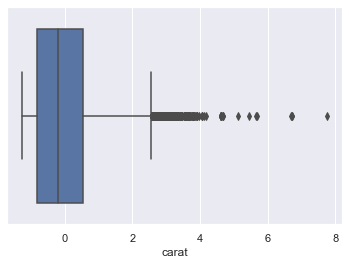

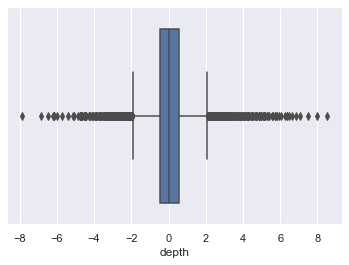

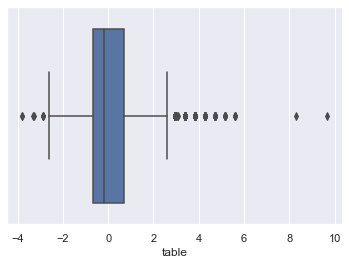

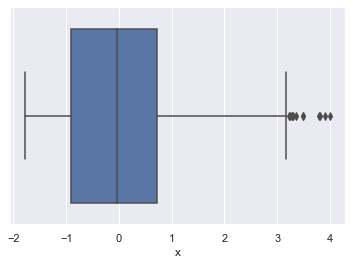

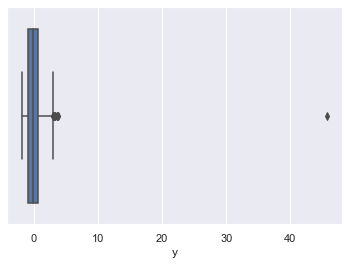

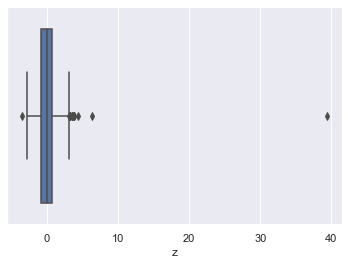

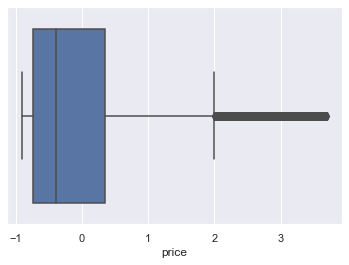

In [46]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z','price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

### Outliers Present is almost all variables.

### After Outlier Treatment

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [48]:
for column in df_num.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

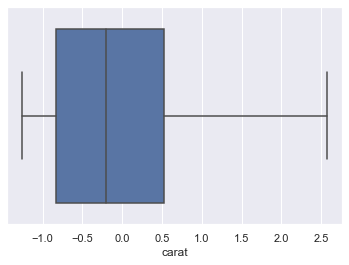

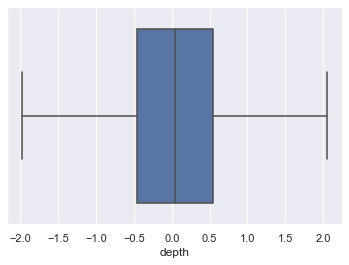

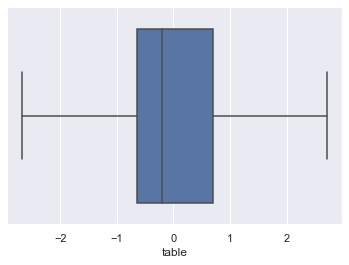

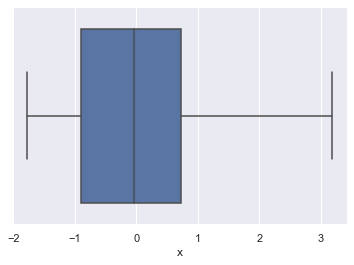

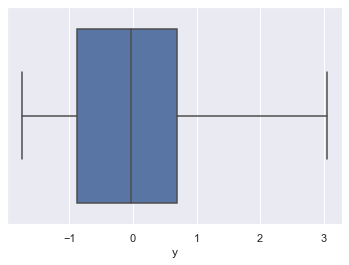

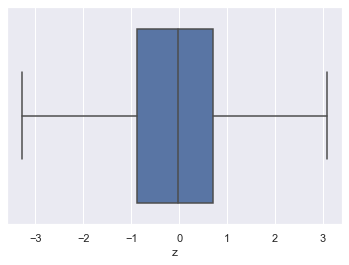

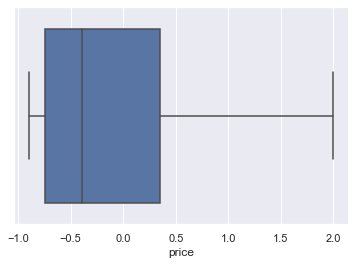

In [49]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

### As observed, all the outliers have been successfully removed. 

## 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

### Converting categorical to dummy variables in data

In [50]:
data = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [51]:
data.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
data.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

### Dummies have been encoded.
### Linear regression model does not take categorical values therefore we have encoded categorical values to integer for better results.

### Splitting the data

In [53]:
# Copy all the predictor variables into X dataframe
X = data.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data[['price']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Linear Regression Model

#### Invoking the LinearRegression function and finding the bestfit model on training data

In [55]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.100941784780449
The coefficient for depth is 0.005605143445570782
The coefficient for table is -0.01331950038680386
The coefficient for x is -0.305043498196334
The coefficient for y is 0.3039144895792659
The coefficient for z is -0.13916571567988056
The coefficient for cut_Good is 0.0940340291297785
The coefficient for cut_Ideal is 0.15231074620567447
The coefficient for cut_Premium is 0.14852774839849314
The coefficient for cut_Very Good is 0.12583881878452674
The coefficient for color_E is -0.04705442233369867
The coefficient for color_F is -0.06268437439142842
The coefficient for color_G is -0.10072161838356805
The coefficient for color_H is -0.20767313311661595
The coefficient for color_I is -0.3239541927462746
The coefficient for color_J is -0.4685893027501581
The coefficient for clarity_IF is 0.9997691394634906
The coefficient for clarity_SI1 is 0.6389785818271349
The coefficient for clarity_SI2 is 0.42959662348315747
The coefficient for clarity_VS1

### Intercept for the model

In [57]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.7567627863049398


### R square on training data

In [58]:
# R square on training data
print("The R-squared score on training data is: ",regression_model.score(X_train, y_train))

The R-squared score on training data is:  0.9419557931252712


### R square on testing data

In [59]:
# R square on testing data
print("The R-squared score on testing data is: ",regression_model.score(X_test, y_test))

The R-squared score on testing data is:  0.9381643998102491


### RMSE on Training data

In [60]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print("The RMSE score on training data is: ",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

The RMSE score on training data is:  0.20690072466418796


### RMSE on Testing data

In [61]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
print("The R-squared score on testing data is: ",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

The R-squared score on testing data is:  0.21647817772382866


### The VIF factor after scaling

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [64]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.35086119845924
depth ---> 4.573918951598579
table ---> 1.7728852812618963
x ---> 463.5542785436457
y ---> 462.769821646584
z ---> 238.65819968687333
cut_Good ---> 3.6096181949437143
cut_Ideal ---> 14.34812508118844
cut_Premium ---> 8.623414379121153
cut_Very Good ---> 7.848451571723688
color_E ---> 2.371070464762613


### We still find we have multi collinearity in the dataset, to drop these values to a further lower level we can drop columns after performing stats model.

* <h3> From stats model we can understand the features that do not contribute to the Model 
* <h4> We can remove those features after that the Vif Values will be reduced. Ideal value of VIF is less tha 5%.

In [65]:
data_train = pd.concat([X_train, y_train], axis=1)

In [66]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

### STATSMODEL 

### Best Parameters

In [67]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.756763
carat            1.100942
depth            0.005605
table           -0.013320
x               -0.305043
y                0.303914
z               -0.139166
cut_Good         0.094034
cut_Ideal        0.152311
cut_Premium      0.148528
cut_Very_Good    0.125839
color_E         -0.047054
color_F         -0.062684
color_G         -0.100722
color_H         -0.207673
color_I         -0.323954
color_J         -0.468589
clarity_IF       0.999769
clarity_SI1      0.638979
clarity_SI2      0.429597
clarity_VS1      0.838088
clarity_VS2      0.766024
clarity_VVS1     0.942077
clarity_VVS2     0.931367
dtype: float64

### Inferential Statistics

In [68]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:18:22   Log-Likelihood:                 2954.6
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18846   BIC:                            -5673.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7568      0.016    -46.999

### As it can be observed above the P-value for depth variable is 0.127 which is greater than our alpha i.e 0.05, depicting multicollinearity present therefore we will drop the variable depth and perform the statsmodel again. 

* <h3> To ideally bring down the values to lower levels we can drop one of the variable that is highly correlated.
* <h4> Dropping variables would bring down the multi collinearity level down.

In [69]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

### RMSE Value

In [70]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math
print("Squareroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual - ",math.sqrt(mse))

Squareroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual -  0.21647817772382846


In [71]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

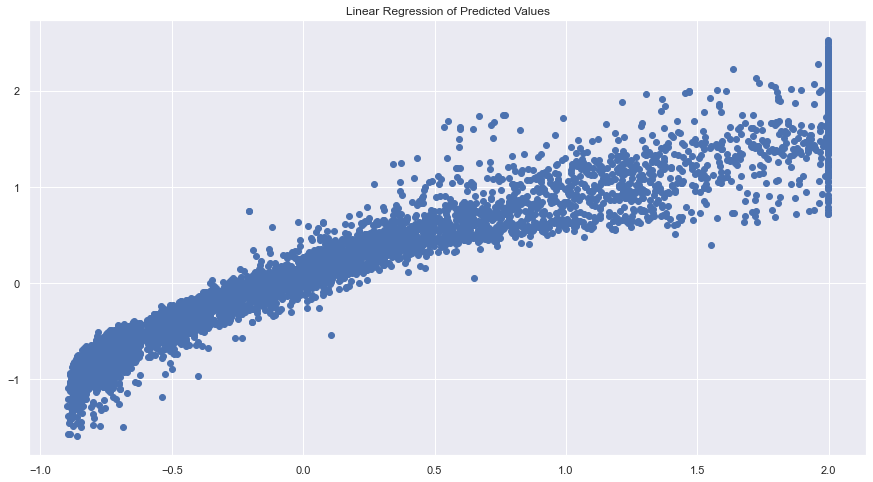

In [72]:
plt.figure(figsize=(15,8))
plt.scatter(y_test['price'], y_pred);
plt.title("Linear Regression of Predicted Values");

### After dropping the depth variable
### OLS Regression Results

### Best Parameters

In [73]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept       -0.756657
carat            1.101954
table           -0.013928
x               -0.315617
y                0.283420
z               -0.108789
cut_Good         0.095123
cut_Ideal        0.151173
cut_Premium      0.147355
cut_Very_Good    0.125514
color_E         -0.047114
color_F         -0.062727
color_G         -0.100657
color_H         -0.207568
color_I         -0.323689
color_J         -0.468428
clarity_IF       1.000046
clarity_SI1      0.639804
clarity_SI2      0.430195
clarity_VS1      0.838626
clarity_VS2      0.766683
clarity_VVS1     0.942390
clarity_VVS2     0.931898
dtype: float64

### Inferential Statistics

In [74]:
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:18:22   Log-Likelihood:                 2953.5
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18847   BIC:                            -5680.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      0.016    -46.991

### The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0


### Concatenate X and y into a single dataframe

In [75]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [76]:
# Calculate MSE
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [77]:
#Root Mean Squared Error - RMSE
print ("The Root Mean Squared Error - RMSE = ",np.sqrt(mse))

The Root Mean Squared Error - RMSE =  0.20690072466418777


### The Complete Equation Achieved after Linear Regression

In [78]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.76) * Intercept + (1.1) * carat + (0.01) * depth + (-0.01) * table + (-0.31) * x + (0.3) * y + (-0.14) * z + (0.09) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

* We had a business problem to predict the price of the stone and provide insights for the company on the profits on different prize slots. From the EDA analysis we could understand the cut, ideal cut had number profits to the company. The colours H, I, J have bought profits for the company. In clarity if we could see there were no flawless stones and they were no profits coming from l1, l2, l3 stones. The ideal, premium and very good types of cut were bringing profits where as fair and good are not bringing profits. 


* The predictions were able to capture **approximately 95%** variations in the price and it is explained by the predictors in the training set. Using stats model if we could run the model again we can have P values and coefficients which will give us better understanding of the relationship, so that values more 0.05 we can drop those variables and re run the model again for better results. 


* For better accuracy dropping depth column in iteration for better results. 


* The equation,

**(-0.76) * Intercept + (1.1) * carat + (-0.01) * table + (-0.32) * x + (0.28) * y + (-0.11) * z + (0.1) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2**

### Recommendations 

* 1. The ideal, premium, very good cut types are the one which are bringing profits so that we could use marketing for these to bring in more profits. 

* 2. The clarity of the diamond is the next important attributes the more the clear is the stone the profits are more 

* The best attributes are

**
* Carat, 
* the diameter of the stone 
* clarity_IF 
* clarity_SI1 
* clarity_SI2 
* clarity_VS1 
* clarity_VS2 
* clarity_VVS1 
* clarity_VVS2


# Problem 2: Logistic Regression and LDA


## You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

* <h3> Loading all the necessary library for the model building and reading the head and tail of the dataset to check whether data has been properly fed

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [80]:
df = pd.read_csv('Holiday_Package.csv').drop("Unnamed: 0",axis=1)

### Head of the Data

In [81]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


### Tail of the Data

In [82]:
df.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


### Checking the Shape of the  Data

In [83]:
print("The total number of rows present in the dataset above is :  ",df.shape[0])
print("The total number of columns/variables present in the dataset above is :  ",df.shape[1])

The total number of rows present in the dataset above is :   872
The total number of columns/variables present in the dataset above is :   7


### Checking the info of the Data

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [85]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

* <h4>No null values in the dataset ,

* <h4>We have integer and object data

### Descriptive Analysis

In [86]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* <h4> We have integer and continuous data,
* <h5> Holiday package is our target variable
* <h6> Salary, age, educ and number young children, number older children of employee have the went to foreign, these are the attributes we have to cross examine and help the company predict weather the person will opt for holiday package or not.

In [87]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Checking unique values for categorical variables

In [88]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




### Percentage of target :

In [89]:
df.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

* <h4> This split indicates that 46% of employees are interested in the holiday package.

### Univariate / Bivariate analysis

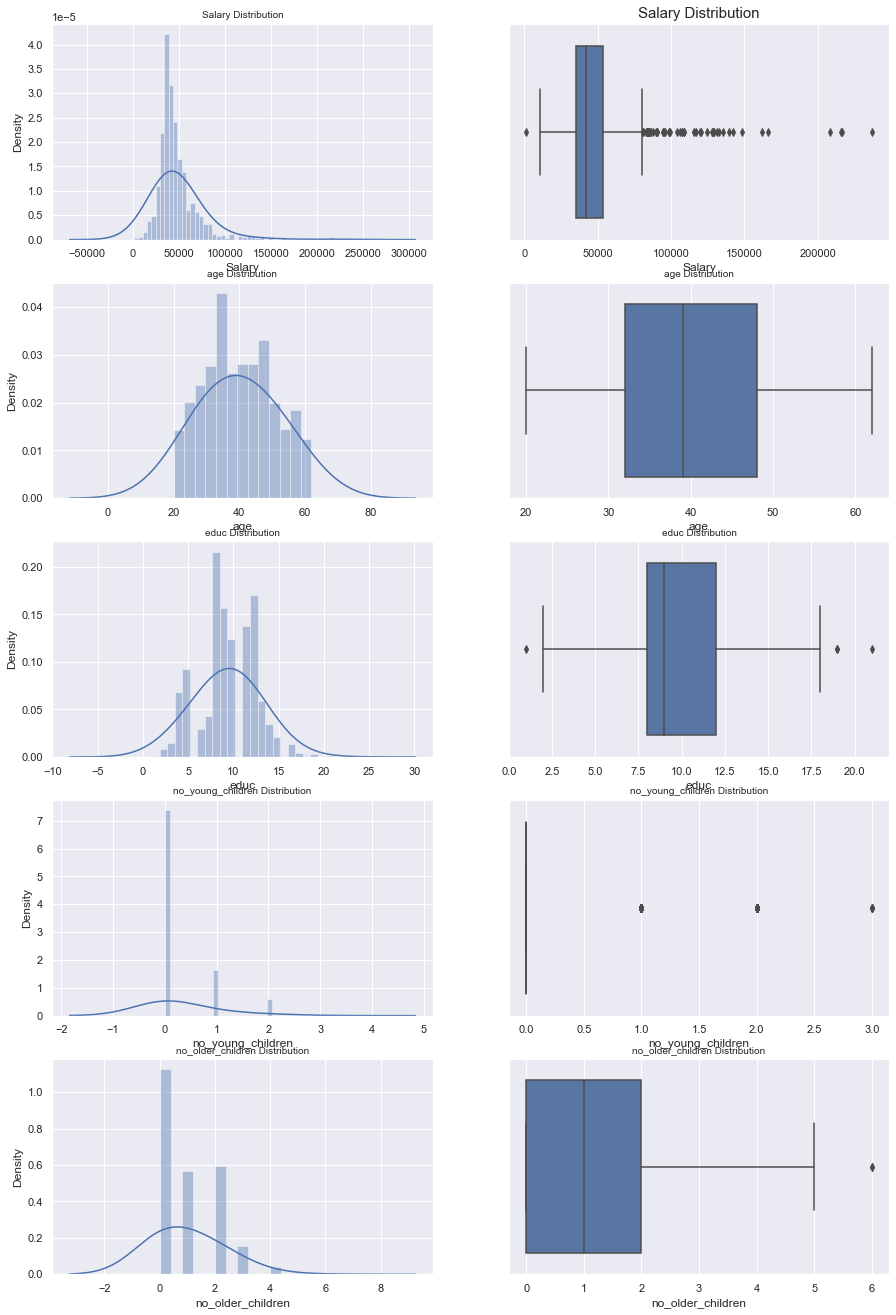

In [90]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 23)

a = sns.distplot(df['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(df['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(df['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(df['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(df['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(df['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(df['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)

a = sns.boxplot(df['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10);

In [91]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

* <h3> We can observe age seems to be normally distributed while there is skewness present in other variables.
* <h4> Moreover outliers are also present in the data. I will not be removing them as they appear to be genuine as a person can have extremely high salary and similarly for other variables.

### Skewness

In [92]:
df.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

### Univariate Analysis for Categorical Variables

### FOREIGN

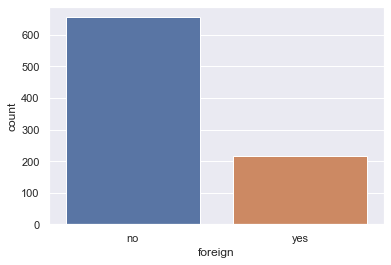

In [93]:
sns.countplot(x="foreign", data=df);

### HOLLIDAY PACKAGE

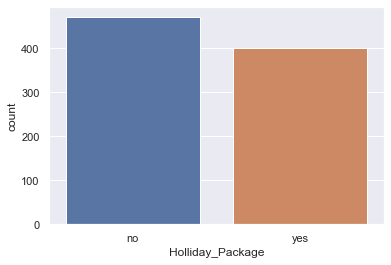

In [94]:
sns.countplot(x="Holliday_Package", data=df);

### HOLLIDAY PACKAGE v/s SALARY

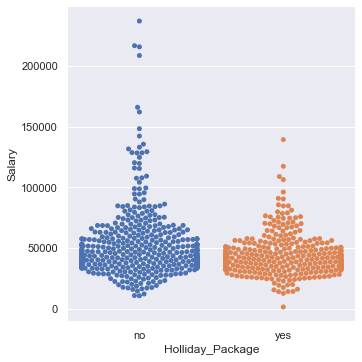

In [95]:
sns.catplot(x="Holliday_Package", y="Salary",kind="swarm",data=df);

* <h4> We can see employee below salary 150000 have always opted for holiday package

### HOLLIDAY PACKAGE v/s AGE

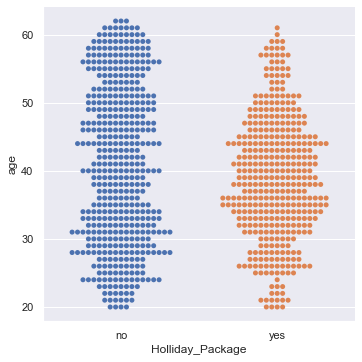

In [96]:
sns.catplot(x="Holliday_Package", y="age",kind="swarm",data=df);

### HOLLIDAY PACKAGE v/s EDUCATION

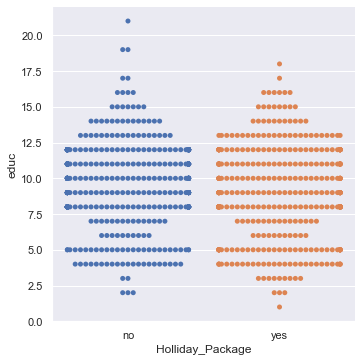

In [97]:
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=df);

### HOLLIDAY PACKAGE v/s YOUNG CHILDREN

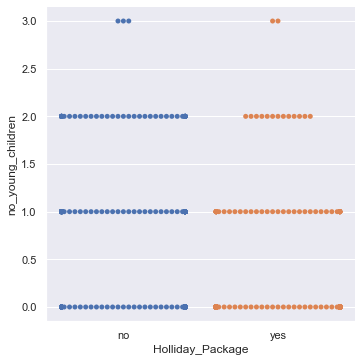

In [98]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df);

### HOLLIDAY PACKAGE v/s OLDER CHILDREN

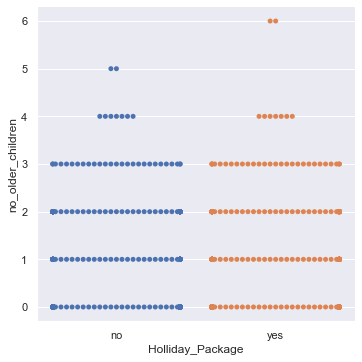

In [99]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df);

### AGE VS SALARY  w.r.t. HOLLIDAY PACKAGE

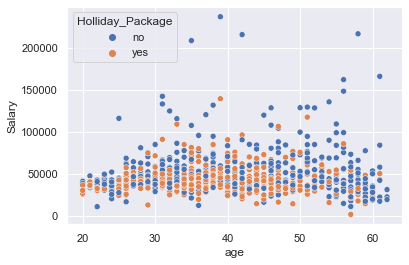

In [100]:
sns.scatterplot(data = df, x='age',y='Salary', hue = 'Holliday_Package');

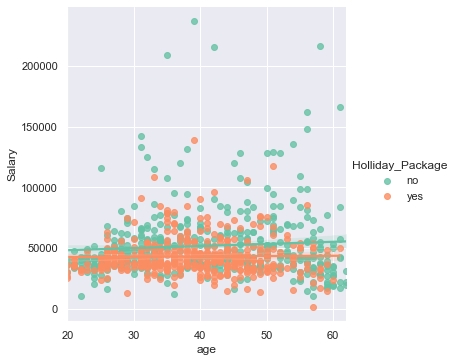

In [101]:
sns.lmplot(x="age", y="Salary", hue="Holliday_Package", data=df,palette="Set2");

* <b> Employee age over 50 to 60 have seems to be not taking the holiday package, whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package.</b>

### EDUC VS SALARY w.r.t HOLLIDAY PACKAGE

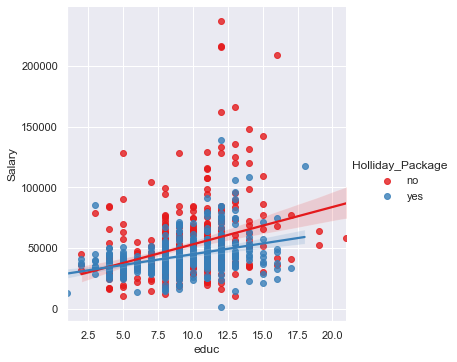

In [102]:
sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=df,palette="Set1");

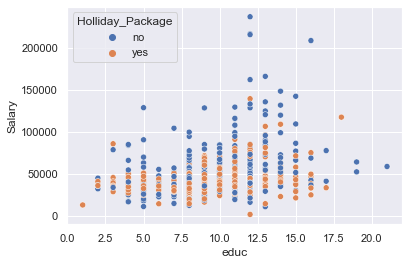

In [103]:
sns.scatterplot(data = df, x='educ',y='Salary', hue = 'Holliday_Package');

### YOUNG CHILDREN VS AGE w.r.t HOLLIDAY PACKAGE

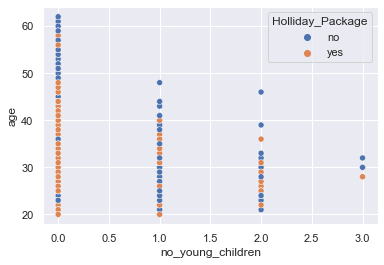

In [104]:
sns.scatterplot(data = df, x='no_young_children',y='age', hue = 'Holliday_Package');

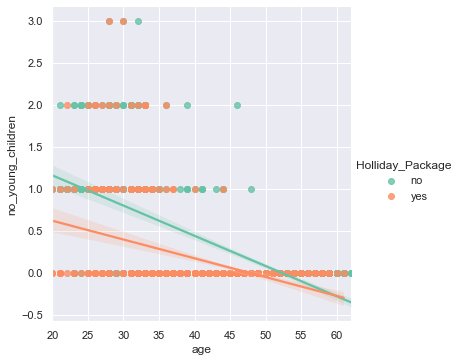

In [105]:
sns.lmplot(x="age", y="no_young_children", hue="Holliday_Package", data=df,palette="Set2");

### OLDER CHILDREN VS AGE w.r.t HOLLIDAY_PACKAGE

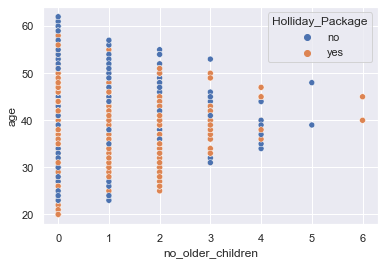

In [106]:
sns.scatterplot(data = df, x='no_older_children',y='age', hue = 'Holliday_Package');

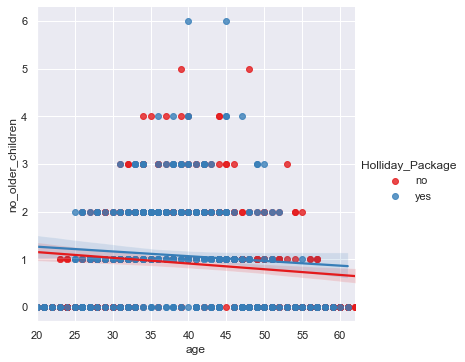

In [107]:
sns.lmplot(x="age", y="no_older_children", hue="Holliday_Package", data=df, palette="Set1");

## Bivariate Analysis

### Pairplot

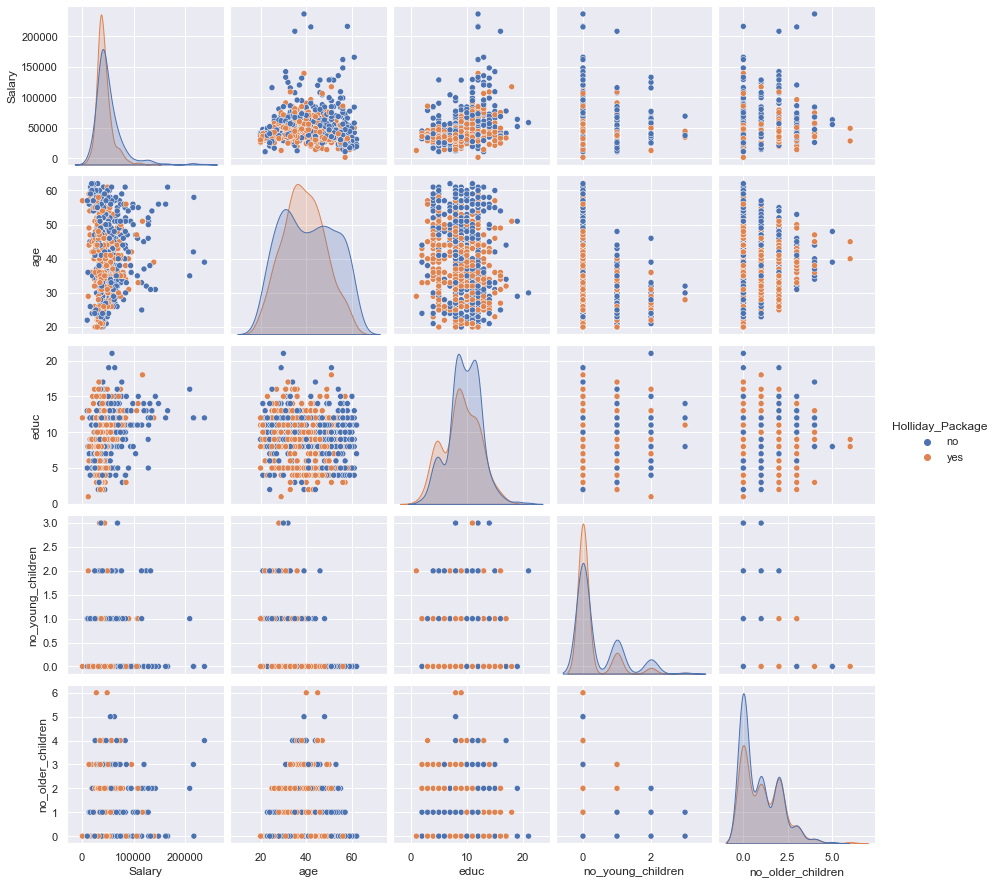

In [108]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='kde' ,hue='Holliday_Package');

* <h4> There is no correlation between the data, the data seems to be normal. There is no huge difference in the data distribution among the holiday package.

### Correlation Plot

In [109]:
corr = df.corr(method="pearson")

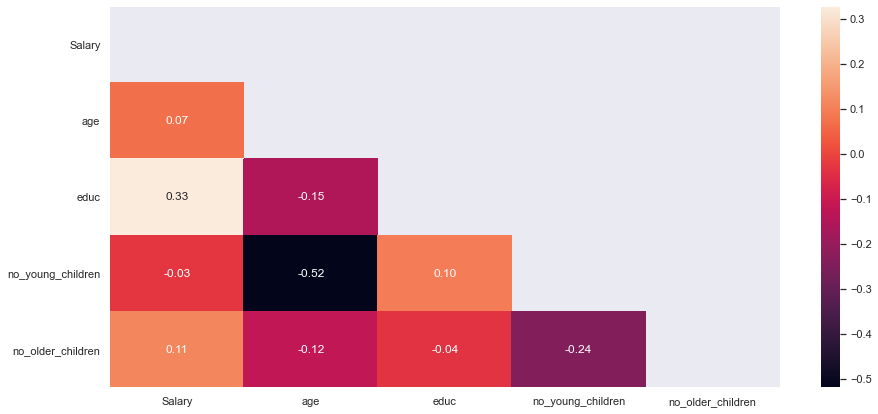

In [110]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

* <h3> No Multicollinearity present in the data.



## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).


### Converting categorical to dummy variables in data

In [111]:
df2=df.copy()
data = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [112]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [113]:
data.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

### Train/Test Split

In [114]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package_yes']

In [115]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [116]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

* <h4>This split indicates that 46% of employees are interested in the holiday package</h4>

### Applying GridSearchCV for Logistic Regression

In [117]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear','newton-cg'],
      'tol':[0.0001,0.000001]}

In [118]:
model = LogisticRegression(max_iter=2000, random_state=1)

In [119]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,scoring='f1')

In [120]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=2000, random_state=1),
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-06]})

In [121]:
print("Best Parameters: ",grid_search.best_params_,'\n')
print("Best Estimator: ",grid_search.best_estimator_)

Best Parameters:  {'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06} 

Best Estimator:  LogisticRegression(max_iter=2000, random_state=1, solver='liblinear', tol=1e-06)


In [122]:
best_model = grid_search.best_estimator_

### Prediction on the training set

In [123]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)
ytest_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

### Getting the probabilities on the test set

In [124]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.672537,0.327463
1,0.581248,0.418752
2,0.684005,0.315995
3,0.536270,0.463730
4,0.545159,0.454841


### LDA Model

#### Using the original data without dummies

In [125]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


### Converting Categorical features to codes

In [126]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


### Splitting the Data into Training and Testing

In [127]:
X = df.drop('Holliday_Package',axis=1)
Y = df.pop('Holliday_Package')

In [128]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

### Building LDA Model

In [129]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)
model

LinearDiscriminantAnalysis()

### Data Prediction

In [130]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

### Training Data Probability Prediction

In [131]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

pd.DataFrame(pred_prob_train).head()


,0,1
0,0.261849,0.738151
1,0.710383,0.289617
2,0.617657,0.382343
3,0.235165,0.764835
4,0.533171,0.466829


### Testing Data Probability Prediction

In [132]:
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)
pd.DataFrame(pred_prob_test).head()

,0,1
0,0.708475,0.291525
1,0.533448,0.466552
2,0.717871,0.282129
3,0.504865,0.495135
4,0.555863,0.444137


## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Logistic Regression Metrics 

* <h3> Confusion matrix and Classification Report on the training data

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.56      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



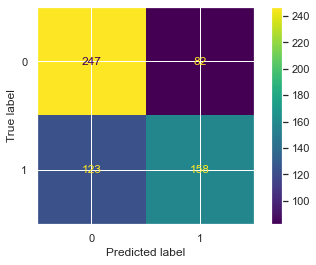

In [133]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

### Confusion matrix and Classification Report on the test data

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       142
           1       0.67      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262
 



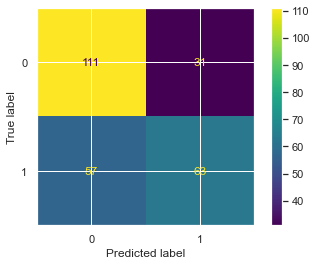

In [134]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### Accuracy - Training Data

In [135]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
print ("The Accuracy of the Training Data is: ",lr_train_acc)

The Accuracy of the Training Data is:  0.6639344262295082


### AUC and ROC for the training data

The AUC score is: 0.734


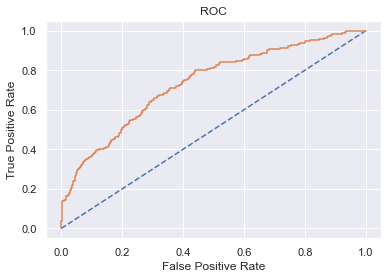

In [136]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('The AUC score is: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

### Accuracy - Test Data

In [137]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
print ("The Accuracy of the Testing Data is: ",lr_test_acc)

The Accuracy of the Testing Data is:  0.6641221374045801


### AUC and ROC for the testing data

The AUC Score is: 0.717


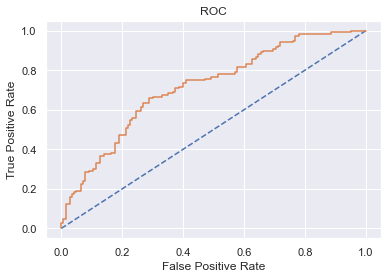

In [138]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('The AUC Score is: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

### Logistic Regression Training Metrics

In [139]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df1.loc["1"][2],2)
lr_train_recall=round(df1.loc["1"][1],2)
lr_train_precision=round(df1.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.56
lr_train_f1  0.61


### Logistic Regression Testing Metrics

In [140]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df1.loc["1"][2],2)
lr_test_recall=round(df1.loc["1"][1],2)
lr_test_precision=round(df1.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.67
lr_test_recall  0.52
lr_test_f1  0.59


### Linear Discriminanat Analysis Metrics


### Accuarcy - Train Data

In [141]:
lda_train_acc = model.score(X_train,Y_train)
print ("The Accuracy of the Training Data is: ",lda_train_acc)

The Accuracy of the Training Data is:  0.6639344262295082


###  Classification Report on the training data

In [142]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



### Confusion matrix on the training data

In [143]:
confusion_matrix(Y_train, pred_class_train)

array([[243,  86],
       [119, 162]], dtype=int64)

### Accuracy - Testing Data

In [144]:
lda_test_acc = model.score(X_test,Y_test)
print ("The Accuracy of the Testing Data is: ",lda_test_acc)

The Accuracy of the Testing Data is:  0.6412213740458015


### Classification Report on the Testing data

In [145]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



### Confusion Matrix on the Testing data

In [146]:
confusion_matrix(Y_test, pred_class_test)

array([[109,  33],
       [ 61,  59]], dtype=int64)

### CHANGING THE CUT-OFF VALUE TO CHECK OPTIMAL VALUE THAT GIVES BETTER ACCURACY AND F1-SCORE

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


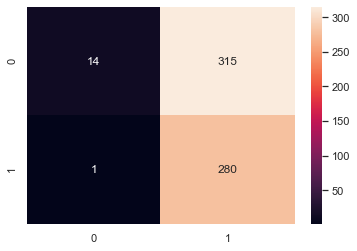

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


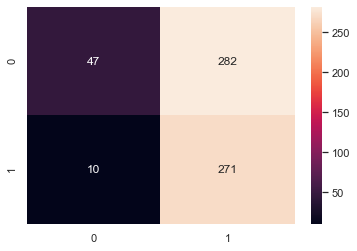

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


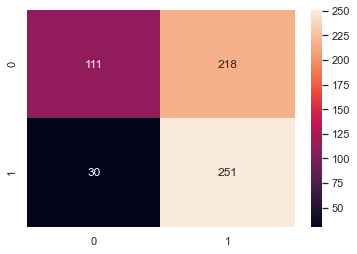

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


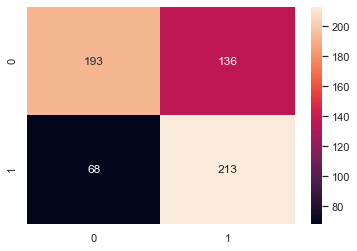

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


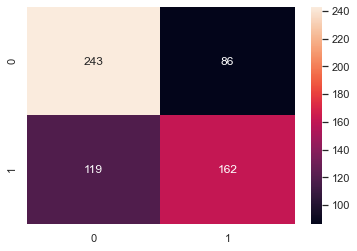

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


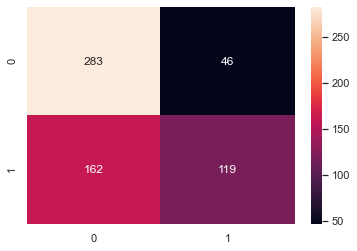

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


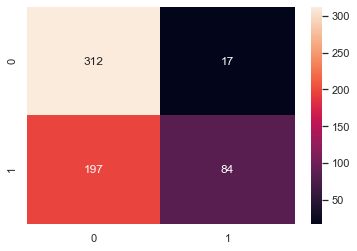

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


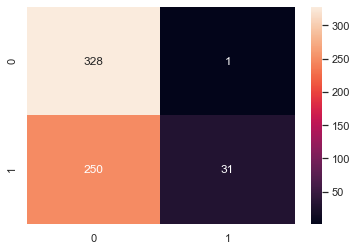

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


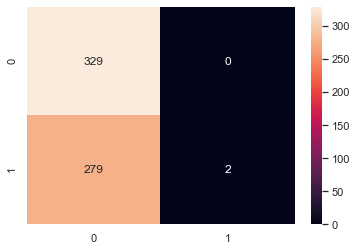

In [147]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

### AUC and ROC for Training and Testing Data

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


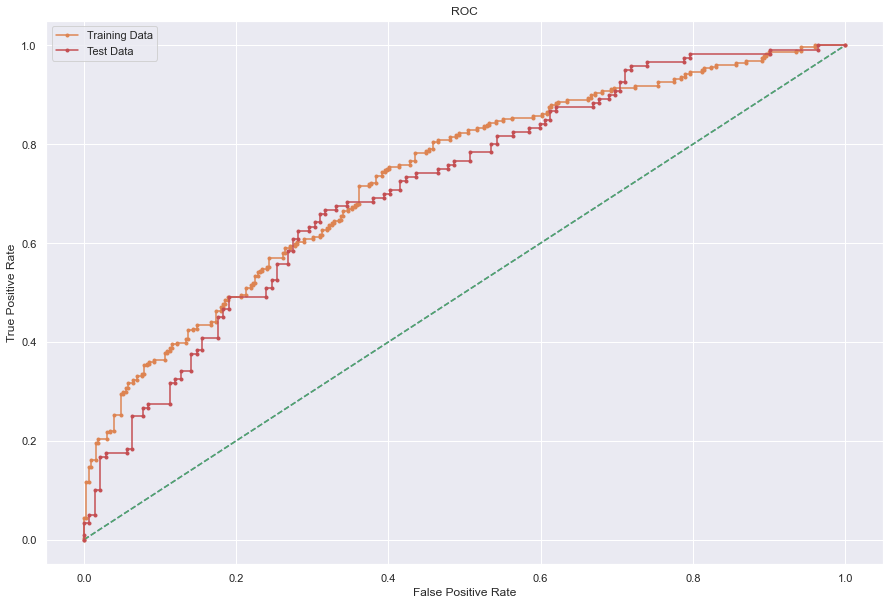

In [148]:
# AUC and ROC for the training data
plt.figure(figsize=(15,10))

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LDA Training Metrics

In [149]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.58
lda_train_f1  0.61


### LDA Testing Metrics

In [150]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.64
lda_test_recall  0.49
lda_test_f1  0.56


### Combined Metrics for Both LDA and LR Model

In [151]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.66,0.66,0.66,0.64
AUC,0.73,0.72,0.73,0.71
Recall,0.56,0.52,0.58,0.49
Precision,0.66,0.67,0.65,0.64
F1 Score,0.61,0.59,0.61,0.56


### Observations

* <b>   Both Models are performing well as the metrics for both Training and Testing Data are almost Similar
* <b>   There is hardly much difference in both models but the Recall, Precision and F1-Score Variation is less for LR as compared to LDA model.
* <b>   Therefore LR Model would be a suitable choice. Moreover LDA mostly asume normal distribution but here thats not the case therefore Logistic Regression would be better.

* <b>  If  we were to scale the data then LDA would have been the better option.


## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

* We had a business problem where we need predict whether an employee would opt for a holiday package or not, for this problem we had done predictions both logistic regression and linear discriminant analysis. Since both are results are same.


* The EDA analysis clearly indicates certain criteria where we could find people aged above 50 are not interested much in holiday packages.
    * So this is one of the we find aged people not opting for holiday packages.
    * People ranging from the age 30 to 50 generally opt for holiday packages.
    * Employee age over 50 to 60 have seems to be not taking the holiday package, whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package.
    
    
#### The important factors deciding the predictions are salary, age and educ.
* Recommendations
     1. To improve holiday packages over the age above 50 we can provide religious destination places as peaceful locations are preferred by people of that age.
     2. For people earning more than 150000 we can provide vacation holiday packages.
     3. For employee having more than 3 number of older children we can provide packages in holiday vacation places.

# Submitted by : Tushar Babbar